# Визуализация данных

На семинаре мы будем заниматься построением различных визуализаций. Наша цель - провести **разведочный анализ данных**, чтобы исследовать поведение данных и выявить в них закономерности.

Мы продолжим работать с данными о пассажирах Титаника.

Цели:
* познакомиться с библиотекой seaborn
* научиться делать различные визуализации
* заполнять пропуски в данных
* делать однофакторный анализ
* конструировать новые признаки

Бонус:
* придумаем свою модель на основе проведенного анализа и сравним с результатом работы метода ближайших соседей

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Загрузим данные.

In [14]:
Data = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv",
                   sep=";")

**Задание 1.** Выведите на экран размеры таблицы

In [3]:
Data.shape

(891, 12)

# Обработка признаков и однофакторный анализ

1) Найдем признаки, у которых есть пропущенные значения и обработаем эти пропущенные значения

2) Переведём категориальные признаки в числовые

**Задание 2.** Выведите основные числовые характеристики числовых столбцов.

In [9]:
Data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,886.000000,886.000000,886.000000,886.000000,711.000000,886.000000,886.000000,886.000000
mean,448.316027,0.383747,2.305869,0.352144,29.743094,0.523702,0.375847,32.279387
std,256.211467,0.486572,0.837071,0.477908,14.505873,1.105202,0.791082,49.817969
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,227.250000,0.000000,2.000000,0.000000,20.750000,0.000000,0.000000,7.903100
50%,448.500000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,669.750000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
Data.describe().loc['mean', :]

PassengerId    448.316027
Survived         0.383747
Pclass           2.305869
Sex              0.352144
Age             29.743094
SibSp            0.523702
Parch            0.375847
Fare            32.279387
Name: mean, dtype: float64

In [5]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


Функция не позволяет увидеть наличие пропусков в нечисловых столбцах.

**Обработаем признак 'Sex'**

**Задание 3.** Проверьте, есть ли пропуски в столбце.

In [5]:
Data.Sex.value_counts()

male       574
female     312
unknown      5
Name: Sex, dtype: int64

In [6]:
Data[Data.Sex == 'unknown']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,Moran; Mr. James,unknown,NaN,0,0,330877,8.4583,NaN,Q
13,14,0,3,Andersson; Mr. Anders Johan,unknown,39.00,1,5,347082,31.2750,NaN,S
28,29,1,3,"O'Dwyer; Miss. Ellen ""Nellie""",unknown,NaN,0,0,330959,7.8792,NaN,Q
49,50,0,3,Arnold-Franchi; Mrs. Josef (Josefine Franchi),unknown,18.00,1,0,349237,17.8000,NaN,S
78,79,1,2,Caldwell; Master. Alden Gates,unknown,0.83,0,2,248738,29.0000,NaN,S


**Задание 4.** Удалите пассажиров неизвестного пола, так как их всего 5.

In [15]:
Data = Data[Data.Sex != 'unknown']

or

In [ ]:
Data.shape

**Задание ***. Подумайте, можно ли как-то узнать пол пассажиров, которые отнесены к категории unknown?

In [48]:
Data[Data.Sex == 'unknown']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Признак 'Sex' является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа. Как это можно сделать? 

**Задание 5.** Придумайте кодировку и сделайте её.

In [4]:
Data['Sex'] = Data['Sex'].map({'male': 1, 'female': 0})
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN,S


or

In [16]:
Data.Sex = Data.Sex.apply(lambda x: 1 if x == 'female' else 0)
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,0,35.0,0,0,373450,8.0500,NaN,S


or

In [49]:
sex_dummy = np.zeros_like(Data.Sex)
sex_dummy[Data.Sex == 'female'] == 1
Data.Sex = sex_dummy.copy()
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,0,35.0,0,0,373450,8.0500,NaN,S


Посмотрим, как влияет пол на выживаемость.

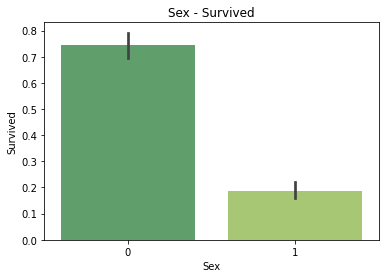

In [5]:
sns.barplot(x='Sex', y='Survived', data=Data, palette='summer')
plt.title('Sex - Survived')
plt.show()

<BarContainer object of 2 artists>

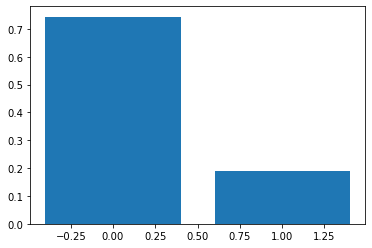

In [6]:
plt.bar([0,1], [Data.Survived[Data.Sex==0].mean(), Data.Survived[Data.Sex ==1].mean()])

Посмотрим, как влияет пол человека и класс билета (Pclass) на выживаемость

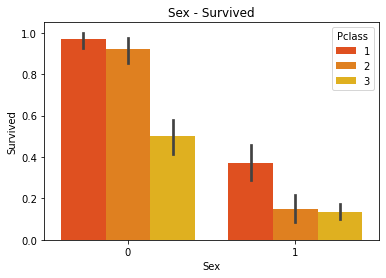

In [7]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=Data, palette='autumn')
plt.title('Sex - Survived')
plt.show()

Ещё один полезный вид визуализации - ящик с усами. Посмотрим на ящик с усами, отражающий распределение пассажиров по полу и возрасту.

C:\Users\Panic\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


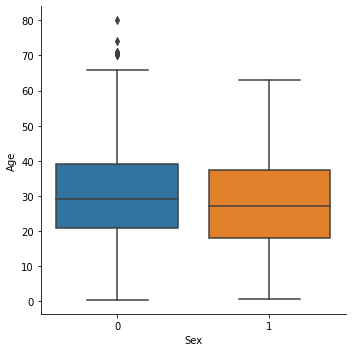

In [18]:
sns.factorplot(x="Sex", y="Age", data=Data, kind="box") # box plot (box-and-whiskers-plot)
plt.show()

Можно детализировать картинку, добавив разделение по Pclass.

C:\Users\Panic\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


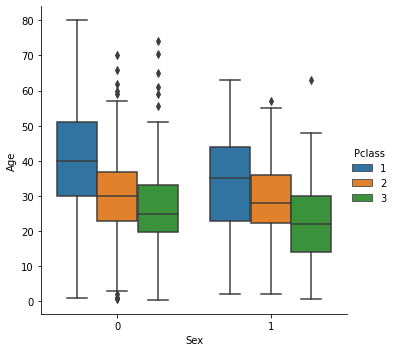

In [23]:
sns.factorplot(x="Sex", y="Age",hue ="Pclass", data=Data, kind="box")
plt.show()

**Обработаем признак 'Embarked'**

In [17]:
print(Data['Embarked'].value_counts(dropna=False))
Data.shape

S      641
C      168
Q       75
NaN      2
Name: Embarked, dtype: int64


(886, 12)

**Задание 6.** Удалим из таблицы пассажиров, для которых неизвестен порт посадки (Embarked).

In [18]:
Data.dropna(subset=['Embarked'], inplace=True)
Data.shape

(884, 12)

**Задание 7.** Закодируем столбец Embarked с помощью OneHot-кодирования (pd.get_dummies). 

In [19]:
Data = pd.get_dummies(Data, columns=['Embarked'], drop_first=True)
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,Braund; Mr. Owen Harris,0,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,1,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,Heikkinen; Miss. Laina,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),1,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,Allen; Mr. William Henry,0,35.0,0,0,373450,8.0500,NaN,0,1


**Обработаем признак 'Age'**

Проверьте, если ли в Age пропущенные значения.

In [20]:
Data.Age.isna().value_counts()

False    709
True     175
Name: Age, dtype: int64

In [21]:
175/(709+175)

0.19796380090497737

In [22]:
mediana_age = Data.Age.median()

In [23]:
Data.Age.fillna(mediana_age, inplace=True)

In [24]:
Data.Age.isna().value_counts()

False    884
Name: Age, dtype: int64

Заполним пропуски медианным значением Age.

In [25]:
median_age = Data['Age'].median()

Data['Age'].fillna(median_age, inplace=True)

Нарисуем распределение возраста пассажиров.

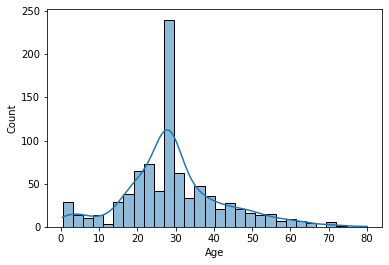

In [40]:
sns.histplot(Data['Age'], kde=True)
plt.show()

Посмотрим на распределение Pclass по возрастам.

C:\Users\Panic\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


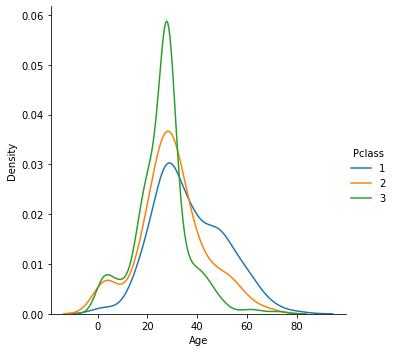

In [41]:
import seaborn as sns

facet = sns.FacetGrid(data = Data, hue = "Pclass", legend_out=True, size = 5)
facet = facet.map(sns.kdeplot, "Age")
facet.add_legend();

**Обработаем признак 'Fare'**

1) Проверьте, если ли в Fare пропущенные значения

2) Если пропущенные значения есть, заполните их медианным значением Fare

In [42]:
Data.Fare.isna().value_counts()

False    884
Name: Fare, dtype: int64

**Обработаем признак 'Pclass'**

Есть ли в Pclass пропущенные значения?

In [43]:
Data['Pclass'].isna().value_counts()

False    884
Name: Pclass, dtype: int64

**Задание 8.** Нарисуйте гистограмму выживаемости в зависимости от Pclass.

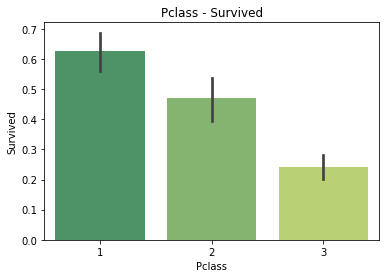

In [44]:
sns.barplot(x='Pclass', y='Survived', data=Data, palette='summer')
plt.title('Pclass - Survived')
plt.show()

**Обработаем признак 'SibSp' (число братьев или сестер, мужей, жен)**

Есть ли в SibSp пропущенные значения?

In [26]:
Data['SibSp'].isna().value_counts()

False    884
Name: SibSp, dtype: int64

**Обработаем признак 'Parch' (число родителей/детей)**

Есть ли в Parch пропущенные значения?

In [27]:
Data['Parch'].isna().value_counts()

False    884
Name: Parch, dtype: int64

**Задание 9.** Столбец PassengerId является категориальным и не несёт важной информации, удалите его.

In [28]:
Data.drop('PassengerId', axis = 1, inplace = True)

In [29]:
Data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,0,3,Braund; Mr. Owen Harris,0,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,1,38.0,1,0,PC 17599,71.2833,C85,0,0
2,1,3,Heikkinen; Miss. Laina,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),1,35.0,1,0,113803,53.1000,C123,0,1
4,0,3,Allen; Mr. William Henry,0,35.0,0,0,373450,8.0500,NaN,0,1


# Исследование признаков и feature engineering

Нарисуем матрицу корреляций числовых признаков между собой и с целевой переменной. 

**Задание 10.** Создайте таблицу NumericData, которая содержит только числовые столбцы из таблицы Data.

In [30]:
#your code here
NumericData = Data._get_numeric_data()

In [31]:
NumericData.corr() #Пирсона

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
Survived,1.000000,-0.335506,0.543777,-0.067165,-0.032450,0.087297,0.256200,0.002703,-0.151664
Pclass,-0.335506,1.000000,-0.129810,-0.338843,0.081720,0.013969,-0.548094,0.217939,0.079008
Sex,0.543777,-0.129810,1.000000,-0.086858,0.116404,0.261302,0.181285,0.074009,-0.120986
Age,-0.067165,-0.338843,-0.086858,1.000000,-0.234719,-0.176253,0.093524,-0.030963,-0.007783
SibSp,-0.032450,0.081720,0.116404,-0.234719,1.000000,0.421809,0.160630,-0.023379,0.067719
Parch,0.087297,0.013969,0.261302,-0.176253,0.421809,1.000000,0.221926,-0.078248,0.056153
Fare,0.256200,-0.548094,0.181285,0.093524,0.160630,0.221926,1.000000,-0.114707,-0.165913
Embarked_Q,0.002703,0.217939,0.074009,-0.030963,-0.023379,-0.078248,-0.114707,1.000000,-0.494518
Embarked_S,-0.151664,0.079008,-0.120986,-0.007783,0.067719,0.056153,-0.165913,-0.494518,1.000000


<AxesSubplot:>

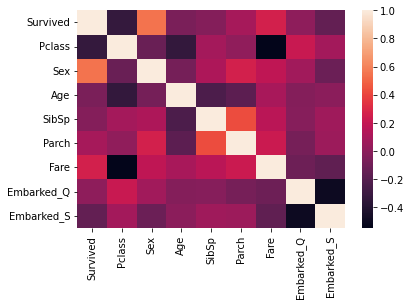

In [32]:
sns.heatmap(NumericData.corr())

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

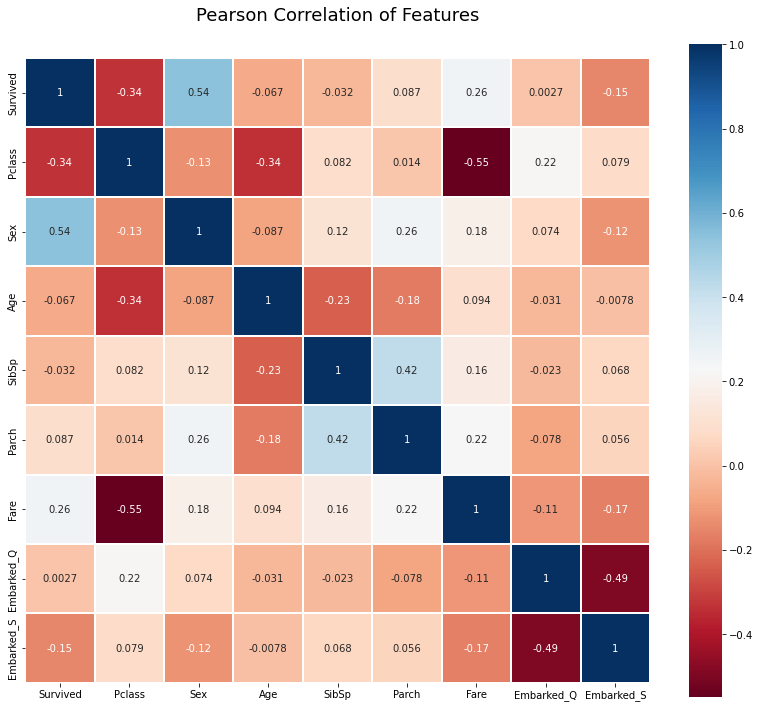

In [33]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(NumericData.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Посмотрим на попарные зависимости некоторых признаков.

C:\Users\Panic\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


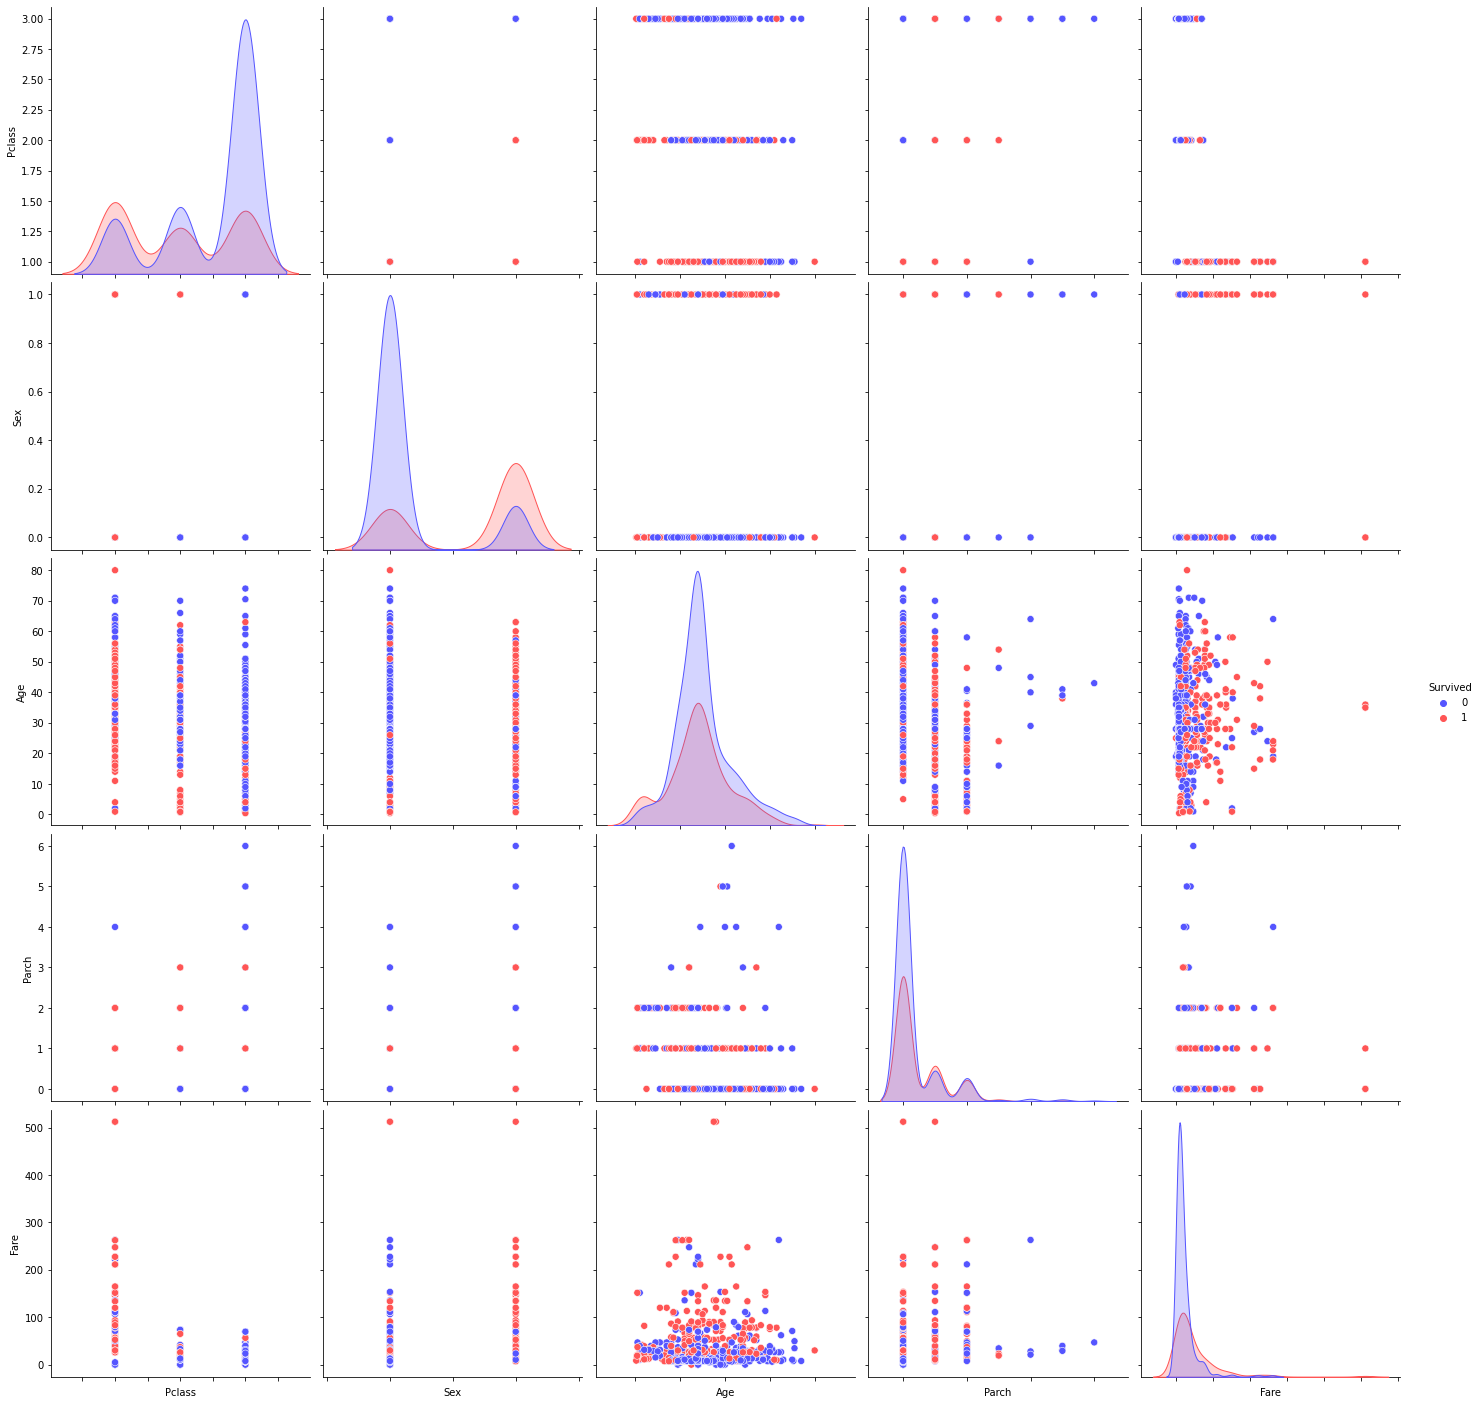

In [34]:
g = sns.pairplot(Data[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare']], \
                 hue='Survived', palette = 'seismic', size=4, diag_kind = 'kde', \
                 diag_kws=dict(shade=True), plot_kws=dict(s=50) )
g.set(xticklabels=[])

Зачастую признак может быть зашумлен или может содержать лишнюю (слишком детализированную, ведущую к переобучению) информацию. Возможным решением этой проблемы служит бинаризация признака.

Бинаризуем признаки Age и Fare

* pd.cut - разбиение целочисленных данных на несколько интервалов по квантилям
* pd.qcut - разбиение числовых (не обязательно целочисленных) данных на несколько интервалов по квантилям

In [36]:
Data['AgeBin'] = pd.cut(Data['Age'].astype(int), 5)

Data['AgeBin'].head()

0    (16.0, 32.0]
1    (32.0, 48.0]
2    (16.0, 32.0]
3    (32.0, 48.0]
4    (32.0, 48.0]
Name: AgeBin, dtype: category
Categories (5, interval[float64, right]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]

Теперь переведём полученные интервалы в числа, используя LabelEncoder.

In [37]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

Data['AgeBin_Code'] = label.fit_transform(Data['AgeBin'])

Data[['Age','AgeBin','AgeBin_Code']].head()

,Age,AgeBin,AgeBin_Code
0,22.0,"(16.0, 32.0]",1
1,38.0,"(32.0, 48.0]",2
2,26.0,"(16.0, 32.0]",1
3,35.0,"(32.0, 48.0]",2
4,35.0,"(32.0, 48.0]",2


**Задание 11.** Бинаризуйте Fare, используя разбиение на 4 интервала.

In [41]:
Data['FareBin'] = pd.cut(Data['Fare'].astype(int), 4)
Data['FareBin'].head()

0    (-0.512, 128.0]
1    (-0.512, 128.0]
2    (-0.512, 128.0]
3    (-0.512, 128.0]
4    (-0.512, 128.0]
Name: FareBin, dtype: category
Categories (4, interval[float64, right]): [(-0.512, 128.0] < (128.0, 256.0] < (256.0, 384.0] < (384.0, 512.0]]

In [42]:
Data['FareBin_cod'] = label.fit_transform(Data['FareBin'])
Data[['Fare', 'FareBin', 'FareBin_cod']].head()

,Fare,FareBin,FareBin_cod
0,7.2500,"(-0.512, 128.0]",0
1,71.2833,"(-0.512, 128.0]",0
2,7.9250,"(-0.512, 128.0]",0
3,53.1000,"(-0.512, 128.0]",0
4,8.0500,"(-0.512, 128.0]",0


In [44]:
Data.FareBin_cod.value_counts()

0    846
1     29
2      6
3      3
Name: FareBin_cod, dtype: int64

Мы не используем всю информацию о данных, в частности, не используем текстовые данные. Также из матрицы корреляций мы видим, что признаки Parch и SibSp слабо коррелируют с выживаемостью (Survived). Сконструируем новые признаки, чтобы решить эти вопросы.

**Задание 12.**

1) Создайте признак 'NameLen' и запишите в него длину имени (Name).

2) Создайте признак 'FamilySize', равный Parch + SibSp + 1. Зачем добавлять 1?

3) Создайте признак 'IsAlone', который показывает, путешествовал человек один или с семьей.

In [47]:
Data['NameLen'] = Data.Name.apply(len)
Data['NameLen'].head()

0    23
1    51
2    22
3    44
4    24
Name: NameLen, dtype: int64

In [48]:
Data['FamilySize'] = Data.Parch+Data.SibSp+1
Data['FamilySize'].head()

0    2
1    2
2    1
3    2
4    1
Name: FamilySize, dtype: int64

In [52]:
Data['IsAlone'] = (Data['FamilySize']==1).astype(int)
Data['IsAlone']

0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: IsAlone, Length: 884, dtype: int32

**Задание 13.** Посмотрите, как коррелируют новые признаки (не забудьте про бинаризованные признаки) со столбцом 'Survived'.

<AxesSubplot:>

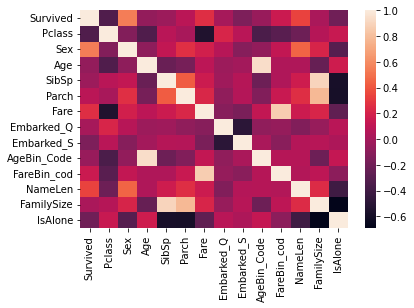

In [59]:
sns.heatmap(Data.corr())
#Пирсон только между непрерывными(между двумя категориальными нельзяа)
# Можно итспользовать
#Непр-непр
#непр-бинар
#бин -бин

#Для категориальных критерий согласия Хи_квадрат, тау кэмбелла

Можно извлечь и другую полезную информацию из данных путём конструирования новых признаков. 

**Задание 14*.** Придумайте ещё новые осмысленные признаки. Проверьте, как они коррелируют с выживаемостью.

In [ ]:
#age**2

In [60]:
Data['AgeSqrt'] = Data.Age.apply(lambda x: x**2)
Data['AgeSqrt'].head()

0     484.0
1    1444.0
2     676.0
3    1225.0
4    1225.0
Name: AgeSqrt, dtype: float64

<AxesSubplot:>

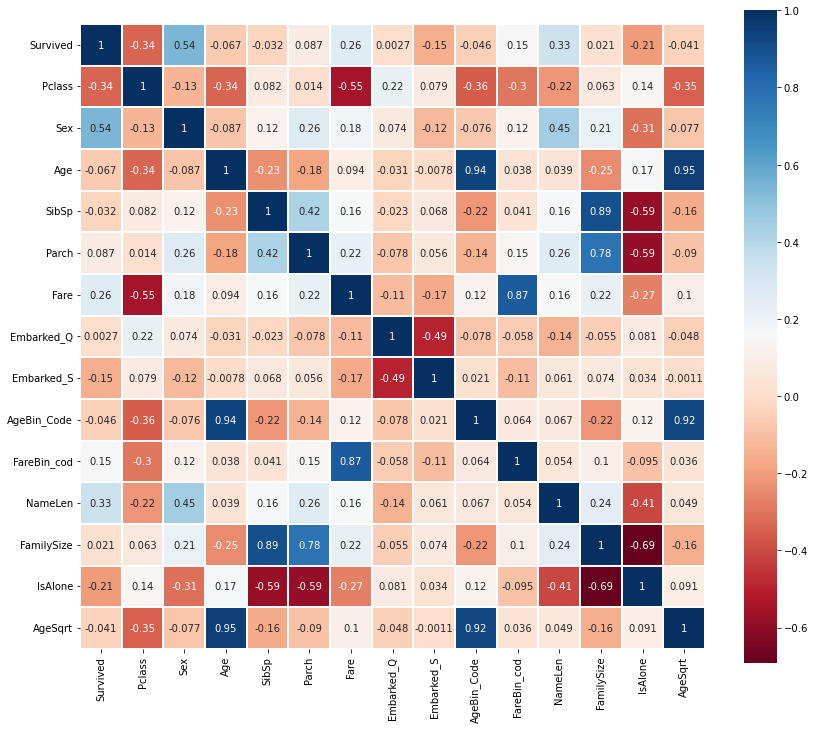

In [63]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

sns.heatmap(Data.corr(),linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)


**Задание 15.** Верно ли, что если признак имеет маленькую по модулю корреляцию с выживаемостью, то это означает, что он не влияет на выживаемость и бесполезен для нашей задачи?

In [65]:
#Нет потому что категориальная переменнная
#Нет, потому что корреляция говорит что нет линейно зависимости, но зависимость может быть нелинейной

# Бонус.

**Задание 16*.** Мы провели довольно подробный однофакторный анализ данных и увидели, какие признаки сильно влияют на выживаемость, а какие нет. 

a) Попробуйте написать свою модель для предсказания выживаемости, используя обнаруженные закономерности. 

b) Оцените качество модели - вычислите долю правильных ответов алгоритма по всем данным.

In [ ]:
def prediction(x):
    # x - один объект
    ...

In [ ]:
from sklearn.metrics import accuracy_score

pred = Data.apply(lambda x: prediction(x), axis=1)

accuracy_score(Data['Survived'], pred)

**Задание 17.***

Разобъем данные на тренировочную и тестовую часть с помощью train_test_split.

2) Обучите KNN на тренировочной части, сделайте предсказание на тесте и вычислите долю правильных ответов.

3) С помощью написанной вами раннее модели сделайте предсказание на тесте и оцените его качество.

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

y = Data['Survived']
X = Data._get_numeric_data().drop('Survived', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [68]:
knn = KNeighborsClassifier()

In [70]:
knn.fit(X_train, y_train)
y_predicted = knn.predict(X_test)

In [71]:
print("Accuracy is: ", np.mean(y_test==y_predicted))

Accuracy is:  0.6515837104072398


In [72]:
# Подбор k на валидационной выборке:
k_best = -1
best_accuracy = 0

for k in range(1, 20):
    y_predicted = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).predict(X_val)

    val_accuracy = np.mean(y_predicted==y_val)                      
    print(f"k = {k}; accuracy = {val_accuracy:.3f}")
                           
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        k_best = k

k_best

NameError: name 'X_val' is not defined